# Project Overview
### Objective
The goal of this project is to predict the survival of passengers on the Titanic using machine learning models. The dataset provided contains various features about passengers, and we aim to build models that can accurately predict survival based on these features.
Dataset

The dataset consists of 891 samples, each representing a passenger. Key features include:

### Variable Definitions and Key

- **PassengerId**: Unique identifier for each passenger

- **Survived**: Survival status
  - `0 = No`
  - `1 = Yes`

- **Pclass**: Ticket class (proxy for socio-economic status)
  - `1 = 1st (Upper)`
  - `2 = 2nd (Middle)`
  - `3 = 3rd (Lower)`

- **Name**: Name of the passenger

- **Sex**: Gender of the passenger

- **Age**: Age in years
  - Fractional if less than 1 year
  - Estimated ages are in the form of `xx.5`

- **SibSp**: Number of siblings/spouses aboard the Titanic
  - Sibling: Brother, sister, stepbrother, stepsister
  - Spouse: Husband, wife (mistresses and fiancés were ignored)

- **Parch**: Number of parents/children aboard the Titanic
  - Parent: Mother, father
  - Child: Daughter, son, stepdaughter, stepson
  - Note: Some children travelled only with a nanny, therefore `parch = 0` for them

- **Ticket**: Ticket number

- **Fare**: Passenger fare

- **Cabin**: Cabin number

- **Embarked**: Port of embarkation
  - `C = Cherbourg`
  - `Q = Queenstown`
  - `S = Southampton`


### Data Preprocessing
**1-Cleaning:**

Drop columns that are less relevant for model training, such as PassengerId, Name, Cabin, and Ticket.
Fill missing values in Age with the median, Fare with the mean, and Embarked with the most frequent value.
Encode categorical variables like Sex and Embarked into numerical values.
**2-Data Splitting:**

The dataset is split into training and testing sets using an 80/20 ratio, resulting in 713 samples for training and 178 samples for testing. This split ensures a sufficient amount of data for training while keeping a representative sample for model evaluation.
Model Training and Evaluation
### Models Evaluated:

Logistic Regression
Decision Tree Classifier
Random Forest Classifier
Gradient Boosting Classifier
MLP Classifier
K-Neighbors Classifier
### Model Descriptions

1. **Logistic Regression**:
   - **Description**: A statistical model used for binary classification problems. It estimates the probability of a binary outcome based on one or more predictor variables, using a logistic function to model the relationship.
   - **Strengths**: Simple to implement, interpret, and efficient for binary classification tasks.

2. **Decision Tree Classifier**:
   - **Description**: A model that splits the data into subsets based on feature values, creating a tree-like structure. Each internal node represents a decision based on a feature, and each leaf node represents a class label.
   - **Strengths**: Easy to visualize and interpret, handles both numerical and categorical data well.

3. **Random Forest Classifier**:
   - **Description**: An ensemble method that builds multiple decision trees and merges them to get a more accurate and stable prediction. It aggregates results from all trees to make a final prediction.
   - **Strengths**: Reduces the risk of overfitting compared to a single decision tree, robust to noisy data.

4. **Gradient Boosting Classifier**:
   - **Description**: An ensemble technique that builds trees sequentially, with each tree correcting the errors of the previous one. It focuses on reducing errors by fitting new trees to the residuals of previous trees.
   - **Strengths**: Often provides high accuracy, handles various types of data well, and can be fine-tuned for better performance.

5. **MLP Classifier (Multi-layer Perceptron)**:
   - **Description**: A type of neural network consisting of multiple layers of nodes (neurons). It learns complex patterns in the data by training on multiple layers of interconnected nodes.
   - **Strengths**: Capable of learning complex relationships and patterns in the data, flexible in terms of model architecture.

6. **K-Neighbors Classifier**:
   - **Description**: A non-parametric model that classifies a data point based on the majority class among its k-nearest neighbors in the feature space. It does not assume any underlying data distribution.
   - **Strengths**: Simple to understand and implement, effective for small datasets with clear class separations.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import ttest_ind
import seaborn as sns

# 1- Import Data

In [2]:
train=pd.read_csv("/kaggle/input/titanic/train.csv")
test=pd.read_csv("/kaggle/input/titanic/test.csv")

# 2- Explore Data

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#show null data for train
null=train.isnull().sum()
null[null>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [8]:
#show null data for test
null=test.isnull().sum()
null[null>0]

Age       86
Fare       1
Cabin    327
dtype: int64

In [9]:
num_duplicates = train.duplicated().sum()
print("Number of duplicated rows for train:", num_duplicates)

num_duplicates = test.duplicated().sum()
print("Number of duplicated rows for test:", num_duplicates)


Number of duplicated rows for train: 0
Number of duplicated rows for test: 0


# 3- Clean Data

In [10]:
# Drop columns that are less likely to affect the model in both datasets
train = train.drop(columns=[ 'Name', 'Cabin', 'Ticket'])
test = test.drop(columns=['Name', 'Cabin', 'Ticket'])

In [11]:
# Fill missing values in 'Age' with the median age in train and test
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

In [12]:
# Fill missing values in 'Embarked' with the most frequent value (mode)
most_frequent_embarked = train['Embarked'].mode()[0]
train['Embarked'] = train['Embarked'].fillna(most_frequent_embarked)
    
most_frequent_embarked = test['Embarked'].mode()[0]
test['Embarked'] = test['Embarked'].fillna(most_frequent_embarked)
    

In [13]:
# Fill missing values in 'Fare' with the mean
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
    

In [14]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [15]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


# 4- Data Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

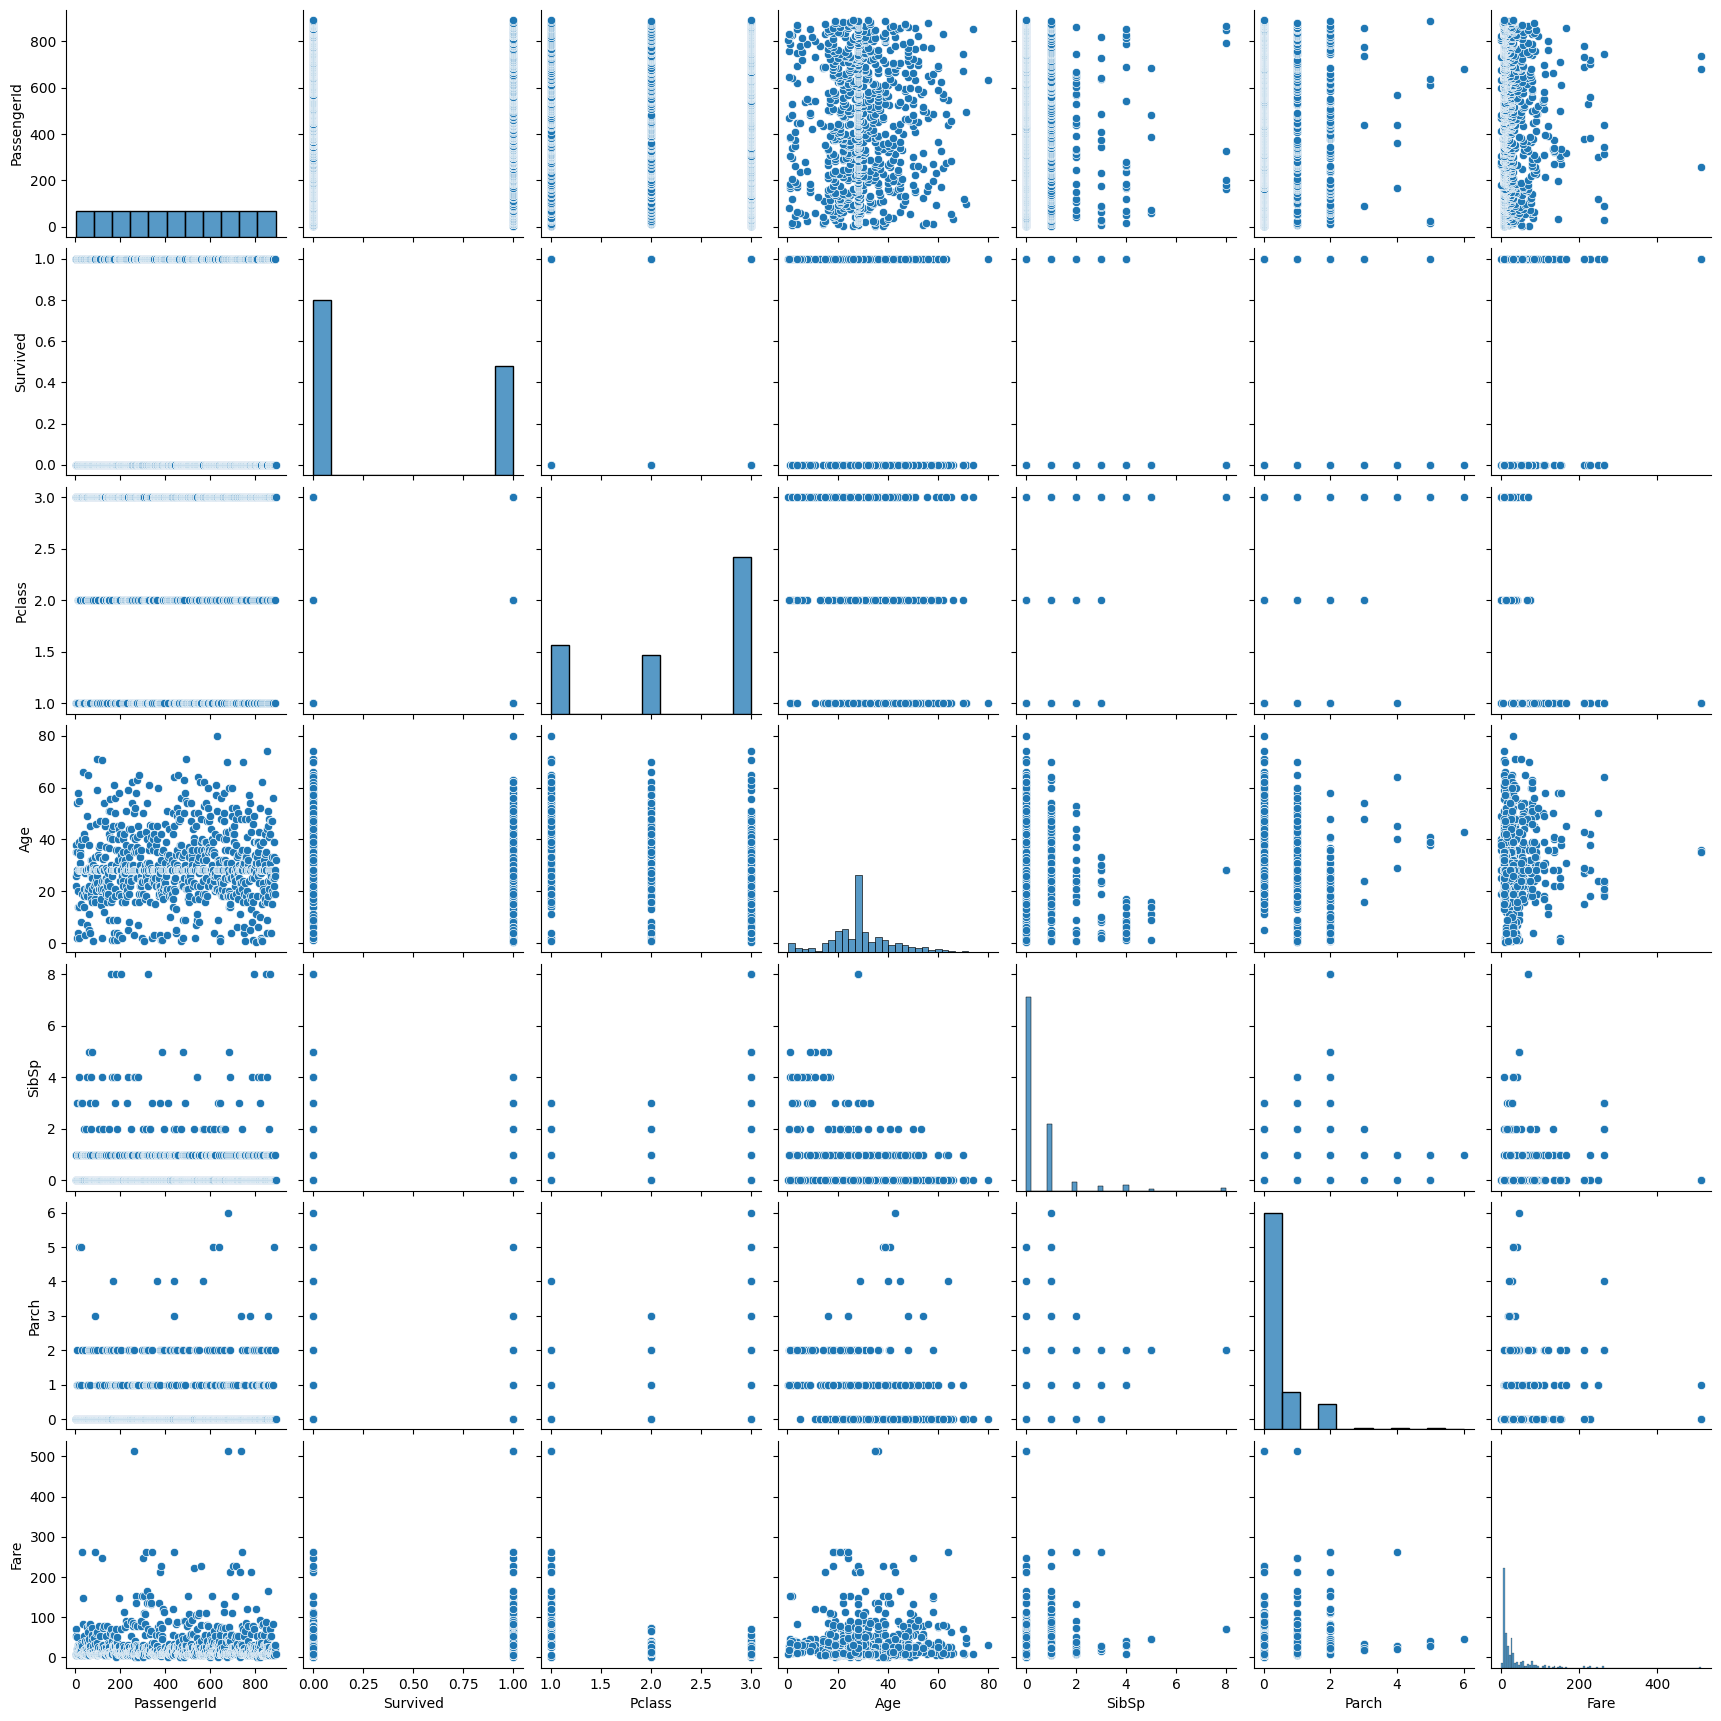

In [16]:
sns.pairplot(train)
plt.show()

<Axes: ylabel='count'>

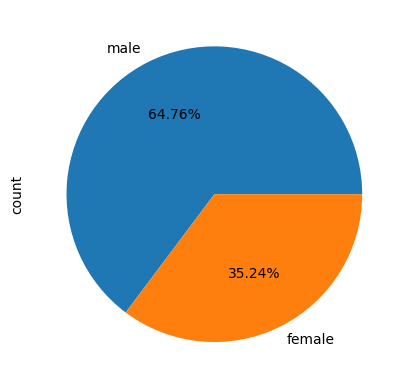

In [17]:
train.Sex.value_counts().plot.pie(autopct='%0.2f%%')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


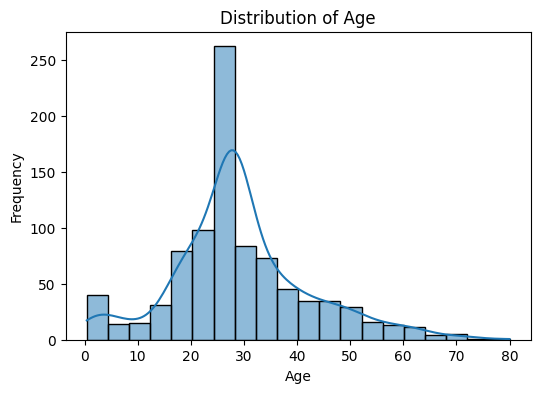

In [18]:
# Plotting the distribution of Age
plt.figure(figsize=(6, 4))
sns.histplot(train['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<Axes: ylabel='count'>

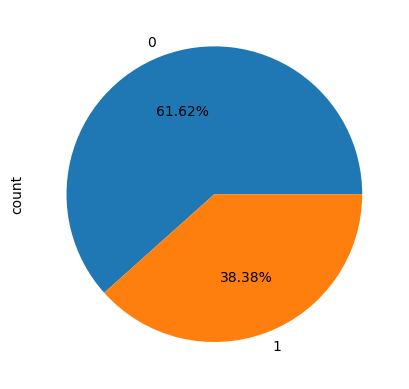

In [19]:
train.Survived.value_counts().plot.pie(autopct='%0.2f%%')

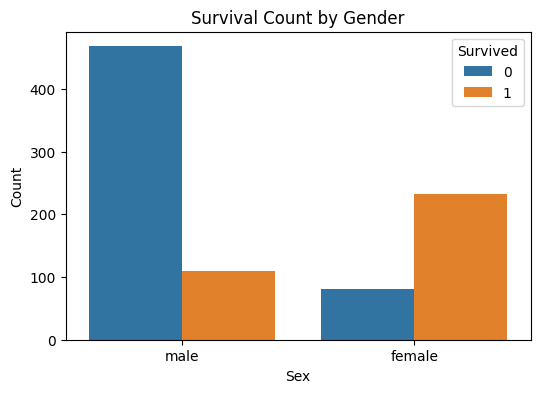

In [20]:
# Set the figure size
plt.figure(figsize=(6, 4))

# Create a bar plot
sns.countplot(x='Sex', hue='Survived', data=train)

# Add title and labels
plt.title('Survival Count by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')

# Show the plot
plt.show()

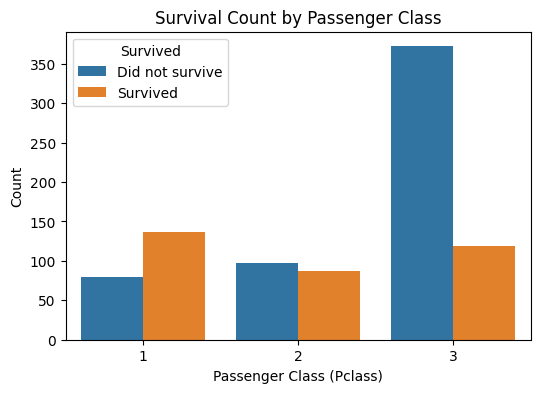

In [21]:
# Plotting the relationship between Pclass and Survived
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Did not survive', 'Survived'])
plt.show()

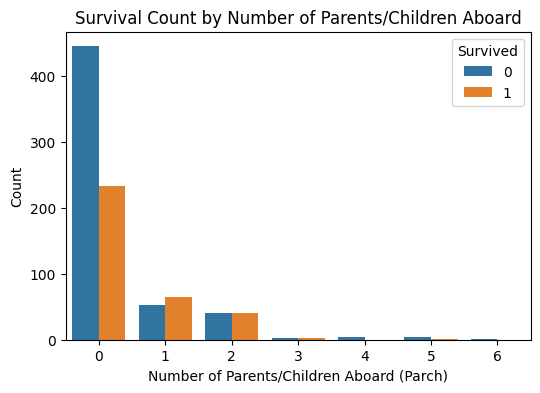

In [22]:
# Plotting the relationship between Parch and Survived
plt.figure(figsize=(6, 4))
sns.countplot(x='Parch', hue='Survived', data=train)
plt.title('Survival Count by Number of Parents/Children Aboard')
plt.xlabel('Number of Parents/Children Aboard (Parch)')
plt.ylabel('Count')
plt.show()

# 4- Transform Data

In [23]:
# Encode categorical variables 
train = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)
test = pd.get_dummies(test, columns=['Sex', 'Embarked'], drop_first=True)


Correlation Matrix


In [24]:
corr=train.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658,0.042939,-0.033606,0.022204
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.543351,0.003650,-0.149683
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.131900,0.221009,0.074053
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.081163,-0.031415,-0.006729
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.114631,-0.026354,0.068734
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.245489,-0.081228,0.060814
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182333,-0.117216,-0.162184
Sex_male,0.042939,-0.543351,0.131900,0.081163,-0.114631,-0.245489,-0.182333,1.000000,-0.074115,0.119224
Embarked_Q,-0.033606,0.003650,0.221009,-0.031415,-0.026354,-0.081228,-0.117216,-0.074115,1.000000,-0.499421
Embarked_S,0.022204,-0.149683,0.074053,-0.006729,0.068734,0.060814,-0.162184,0.119224,-0.499421,1.000000


<Axes: >

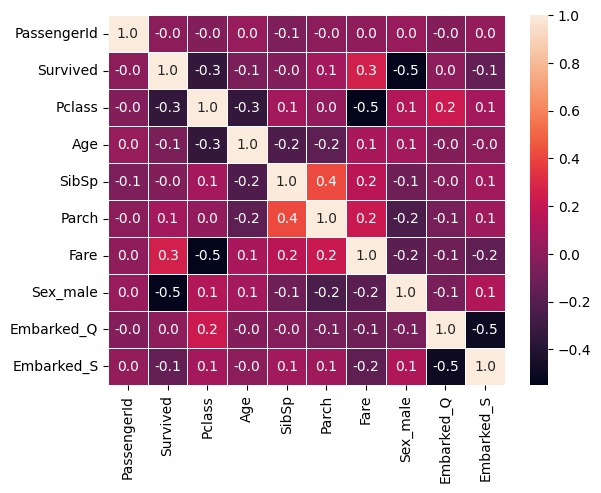

In [25]:
sns.heatmap(corr,annot= True, fmt='.1f',linewidth=.5)

# 5- Creating Model

In [26]:
x=train.drop(['Survived'],axis=1)
y=train.Survived

In [27]:
from sklearn.model_selection import train_test_split

#split dataset into training and testing sets with 80% train and 20% test 

# Set a random seed
np.random.seed(22)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)


In [28]:
accuracies=[]

Creating a function that fits a model, makes predictions, calculates the accuracy, prints it, and appends it to the accuracies list.

In [29]:
from sklearn.metrics import accuracy_score

def all(model):
    # Fit the model on the training data
    model.fit(x_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print accuracy
    print('Accuracy is: ', accuracy)
    accuracies.append(accuracy)

    
    #return accuracy


The Models

In [30]:
from sklearn.linear_model import LogisticRegression

model1=LogisticRegression()
all(model1)

Accuracy is:  0.776536312849162


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
all(model2)

Accuracy is:  0.770949720670391


In [32]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier()
all(model3)

Accuracy is:  0.8491620111731844


In [33]:
from sklearn.neighbors import KNeighborsClassifier

model4 = KNeighborsClassifier()
all(model4)

Accuracy is:  0.6256983240223464


In [34]:
from sklearn.ensemble import GradientBoostingClassifier

model5 = GradientBoostingClassifier()
all(model5)

Accuracy is:  0.8324022346368715


In [35]:
from sklearn.neural_network import MLPClassifier

model6 = MLPClassifier()
all(model6)

Accuracy is:  0.8044692737430168


In [36]:
#list of models
models=['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier',
        'GradientBoostingClassifier','MLPClassifier']

In [37]:
# Create a DataFrame to summarize models and their accuracies
models_summary = pd.DataFrame({'Models': models, 'Accuracies': accuracies})
models_summary


,Models,Accuracies
0,LogisticRegression,0.776536
1,DecisionTreeClassifier,0.770950
2,RandomForestClassifier,0.849162
3,KNeighborsClassifier,0.625698
4,GradientBoostingClassifier,0.832402
5,MLPClassifier,0.804469


Select RandomForestClassifier as it has the highest accurcy 

In [38]:
# Initialize and train the model
final_model=RandomForestClassifier()
final_model.fit(x_train, y_train)

RandomForestClassifier()

In [39]:
# Make predictions on test data
final_predict = final_model.predict(test)

In [40]:
final=test.PassengerId

In [41]:
# Create submission DataFrame

submission=pd.DataFrame({'PassengerId':final,'Survived':final_predict})

In [42]:
# Save predictions to a CSV file

submission.to_csv('submission.csv',index=False)
print('Submission file created successfully!')

Submission file created successfully!
